# <center>Thuật toán giải hệ bất phương trình tuyến tính</center><font size="5"><center>Nguyễn Trương Phi</center></font>

# Giới thiệu
Một thuật toán giúp giải các bài toán tìm tối ưu của các biến để thỏa mãn các điều kiện cho trước bằng cách giải hệ bất phương trìnhThuật toán thích hợp để chọn lựa tổ hợp tối ưu trong thời gian nhanh nhất mà không cần phải tạo tất cả tổ hợp rồi xét điều kiện ở từng tổ hợp.

# Quy trình 
<center><img src="Quy_trình.png" style="background-color:white;"  width="800" height="auto"/></center>

## Bài toán
Giá, trọng lượng và giá sau khi nuôi trên thị trường của các giống vật nuôi (gà con, heo con, $\dots$ ) được cho như Bảng sau. Một người nông dân muốn mua một số con vật để đem về nuôi nhưng trong ví của anh ta chỉ có 1000\$ và chỉ có thể chở về trang trại của mình tối đa 500 kg. Hỏi anh ta phải lựa chọn số lượng giống vật nuôi con như thế nào để khi nuôi xong giá trị chúng mang lại theo giá thị trường là cao nhất,

|                         | **Mực** | **Gà** | **Heo** | **Cừu** |
|-------------------------|---------|--------|---------|---------|
| **Giá (\$)**            | 2    | 5   | 7    | 10   |
| **Trọng lượng (kg)**    | 2    | 5   | 10   | 15   |
| **Giá thị trường (\$)** | 4    | 8   | 11   | 19   |


Đặt số lượng mỗi loại giống sẽ lấy là $m, g, h, c \in \mathbb{N}^*$, tương ứng với các loại giống Mực, Gà, Heo, Cừu. Từ đó ta có có hệ bất phương trình


$$
\begin{cases} 2m + 5g + 7h + 10c &\le 1000\\2m + 5g + 10h + 15c &\le 500\\4m + 8g + 11h + 19c &= {G_{\max }} \end{cases}
$$

## Giải

### Khảo sát 

In [1]:
import sinequal as sin

biens = ["m","g","h","c"] # Khai báo tên biến
cuctri = [0,0,0,0]	# Khai báo biến có phải cực trị (0: không phải, 1: cực đại, -1: cực tiểu)
he_bpt = ["2*m+5*g+7*h+10*c<=1000","2*m+5*g+10*h+15*c<=500",
			"m>=1","g>=1","h>=1","c>=1"]

nghiem = sin.Solve_Inequal(biens, cuctri, he_bpt)[1]

{0: '-'}
{0: '-', 1: '-'}
{0: '-', 1: '-', 2: '-'}


In [10]:
weight = [2*i[0]+5*i[1]+10*i[2]+15*i[3] for i in nghiem] # khoi luong cua hang
price = [2*i[0]+5*i[1]+7*i[2]+10*i[3] for i in nghiem] # gia cua hang
price_tt = [4*i[0]+8*i[1]+11*i[2]+19*i[3] for i in nghiem] # gia thi truong
print(max(price_tt))

978


In [6]:
import matplotlib.pyplot as plt
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(weight, price, price_tt, color = "green",s=1)
plt.title("Mối tương quan")
 
# show plot
%matplotlib qt
plt.show()


In [7]:

def plot2D(b1,b2): # Vẽ đồ thị 2D
    # Vẽ đồ thị dotplot để khảo sát mối tương quan
    plt.scatter(b1,b2)
    plt.grid()
    plt.show()

plot2D(weight,price) #x và y

In [8]:
plot2D(weight,price_tt) #x và z

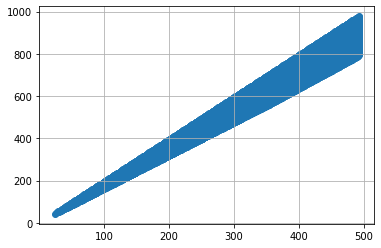

In [16]:
plot2D(price,price_tt) #y và z

### Khảo sát cực trị

In [14]:
biens = ["m","g","h","c","G"] # Khai báo tên biến
cuctri = [0,0,0,0,1]	# Khai báo biến có phải cực trị (0: không phải, 1: cực đại, -1: cực tiểu)
he_bpt = ["2*m+5*g+7*h+10*c<=1000","2*m+5*g+10*h+15*c==500","4*m+8*g+11*h+19*c-G==0",
			"m>=1","g>=1","h>=1","c>=1"]

nghiem = sin.Solve_Inequal(biens, cuctri, he_bpt)[1]
print(nghiem)

{0: 931}
{0: 931, 1: '-'}
{0: 931, 1: '-', 2: '-'}
{0: 931, 1: '-', 2: '-', 3: '-'}
{0: 930}
{0: 930, 1: '-'}
{0: 930, 1: '-', 2: '-'}
{0: 930, 1: '-', 2: '-', 3: '-'}
{0: 929}
{0: 929, 1: '-'}
{0: 929, 1: '-', 2: '-'}
{0: 929, 1: '-', 2: '-', 3: '-'}
{0: 928}
{0: 928, 1: '-'}
{0: 928, 1: '-', 2: '-'}
{0: 928, 1: '-', 2: '-', 3: '-'}
[[225, 5, 1, 1, 970]]


In [7]:
def phogia(index,tieu_bien3): #từ index của biến còn lại và hàm tiêu biến xuất ra list giá trị 
    max_bien = []
    min_bien = []
    for i in range(len(tieu_bien3)):
        if tieu_bien3[i][index] > 0:
            min_bien.append(-tieu_bien3[i][-1]/ tieu_bien3[i][index])
        elif tieu_bien3[i][index] < 0:
            max_bien.append(-tieu_bien3[i][-1]/ tieu_bien3[i][index])
    #print(max_bien)
    #print(min_bien)

    max_bien_value = math.floor(min(max_bien))
    #print(max_bien_value)

    min_bien_value = math.ceil(max(min_bien))
    #print(min_bien_value)

    return list(range(min_bien_value,max_bien_value+1))